In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
reg_szn = pd.read_csv("../data/Stephen_Curry_Regularseason_Stats.csv")
twentyone = reg_szn[reg_szn['Season_year'] == '2020-2021']
by_szn = reg_szn.groupby('Season_year').mean()
w_l_converted = twentyone['Result'].eq('W').mul(1)
twentyone['Result'] = w_l_converted
twentyone

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data=twentyone, x='3P%', y='PTS', hue='Result');

In [ ]:
sns.regplot(x='FGM', y='PTS', data=twentyone)

In [ ]:
twentyone_numeric = twentyone.drop(labels=['Season_year','Season_div', 'Date','OPP', 'FG','3PT', 'FT','Result'],axis=1)
twentyone_numeric

In [ ]:
twentyone_num_normalized = (twentyone_numeric - twentyone_numeric.mean()) / twentyone_numeric.std()
twentyone_num_normalized['Result'] = w_l_converted
twentyone_num_normalized

In [ ]:
correlation = twentyone_num_normalized.corr()
sns.heatmap(correlation, cmap='viridis');

In [ ]:
post_szn = pd.read_csv("../data/Stephen_Curry_Postseason_Stats.csv").drop(labels='Season_div', axis=1)
post_szn_w_l_converted = post_szn['Result'].eq('W').mul(1)
post_szn['Result'] = post_szn_w_l_converted
post_szn.sort_values(by='3P%', ascending=False)


In [ ]:
post_szn_numeric = post_szn.select_dtypes([np.number])
post_szn_numeric_normalized = (post_szn_numeric - post_szn_numeric.mean()) / post_szn_numeric.std()
sns.heatmap(post_szn_numeric_normalized.corr(), cmap='viridis')
    

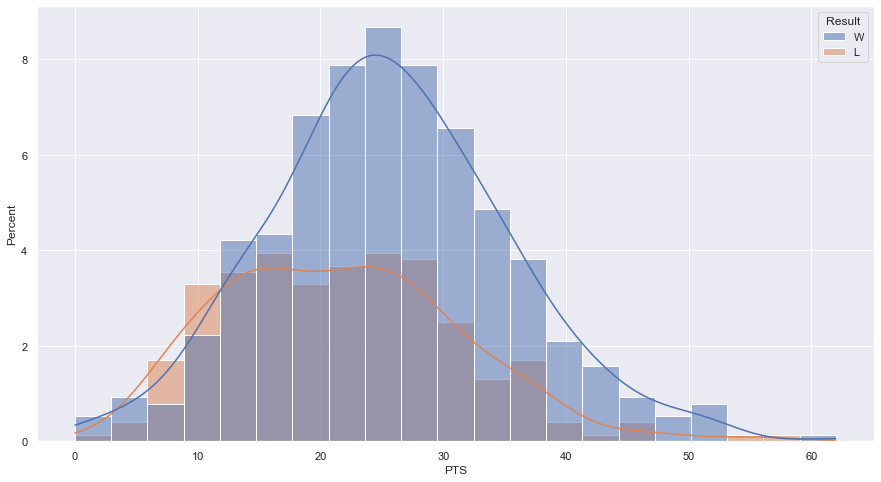

In [29]:
sns.histplot(data=reg_szn, x='PTS', stat='percent', hue='Result', kde=True);


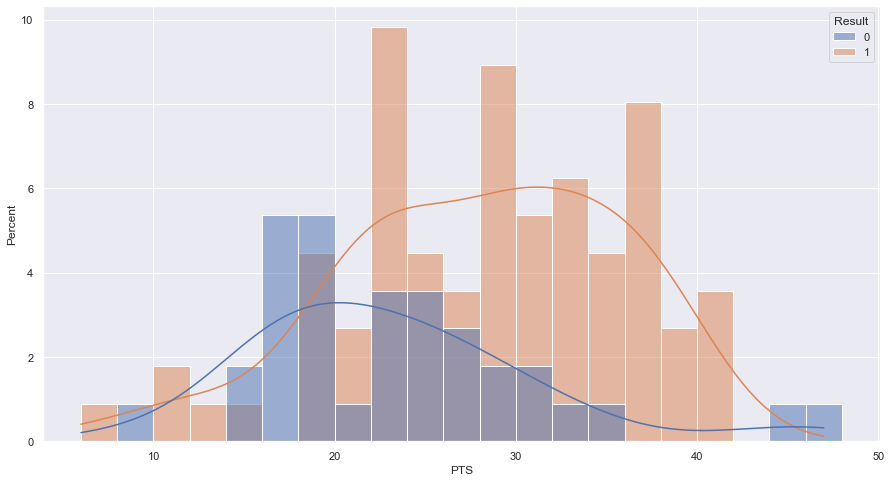

In [36]:
sns.histplot(data=post_szn, x='PTS', stat='percent', hue='Result', kde=True, binwidth=2);

In [38]:
twentyone_sixteen = reg_szn[(reg_szn['Season_year'] == '2020-2021') | (reg_szn['Season_year'] == '2015-2016')]
twentyone_sixteen.head()

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,FTM,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS
415,2015-2016,Regular,Wed 4/13,MEM,W,125,104,30.0,15-24,15,...,6,6,100.0,4,6,0,2,2,2,46
416,2015-2016,Regular,Sun 4/10,SAS,W,92,86,35.0,13-22,13,...,7,7,100.0,5,5,0,2,4,4,37
417,2015-2016,Regular,Sat 4/9,MEM,W,100,99,34.0,7-22,7,...,0,0,0.0,9,8,0,1,1,2,17
418,2015-2016,Regular,Thu 4/7,SAS,W,112,101,36.0,11-19,11,...,2,2,100.0,5,9,0,2,2,3,27
419,2015-2016,Regular,Tue 4/5,MIN,L,117,124,43.0,7-25,7,...,3,3,100.0,6,15,0,3,4,3,21


In [ ]:
sns.histplot(data=twentyone_sixteen, x='PTS', )